## Observations and Insights 

-Weight seemed to play a factor in making the drug less effective (See Linear Regression plot)
-On a Single mouse, Capomulin initially had little impact on tumor, actually gettin worse, but after 10 days the tumor volumn begin a fast decline over the next five days. Over the 45 days the tumor volumn reduce approximately 31%. We would need to see simular results for other mice treated with Capomulin to be acceptable.
-Looking at the Box plot Capomulin and Ramican wer the more effective drugs used during the 45 day trail.

#Resources
Lambda - https://www.programiz.com/python-programming/anonymous-function#:~:text=Use%20of%20Lambda%20Function%20in%20python%20We%20use,built-in%20functions%20like%20filter%20%28%29%2C%20map%20%28%29%20etc.https://www.programiz.com/python-programming/anonymous-function#:~:text=Use%20of%20Lambda%20Function%20in%20python%20We%20use,built-in%20functions%20like%20filter%20%28%29%2C%20map%20%28%29%20etc.
DataFrame Merge - https://www.geeksforgeeks.org/joining-two-pandas-dataframes-using-merge/https://www.geeksforgeeks.org/joining-two-pandas-dataframes-using-merge/
AGG - https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.htmlhttps://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html
BoxPlots - https://www.askpython.com/python/examples/boxplotshttps://www.askpython.com/python/examples/boxplots
         - (https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py)  
Correlation - https://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlationhttps://realpython.com/numpy-scipy-pandas-correlation-python/#linear-correlation

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem


In [3]:
# Study data files
mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
mouse_df['Mouse ID'].nunique()

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
dup_mouse_data = (mouse_df.loc[dup_mouse.values, ['Mouse ID', 'Timepoint']])
dup_mouse_ID = dup_mouse_data['Mouse ID'].unique()

print(dup_mouse_ID)

['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = (mouse_df.loc[dup_mouse.values, ['Mouse ID', 'Timepoint']])
dup_mouse_data

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_cln = mouse_df.drop(mouse_df.loc[mouse_df['Mouse ID'] == 'g989'].index) #, inplace=True)
mouse_df_cln

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
mouse_df_cln['Mouse ID'].nunique()

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculate the mean, median, standard deviation, and sem for each drug
t_mean = mouse_df_cln.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
t_median = mouse_df_cln.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
t_variance = mouse_df_cln.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
t_std_dev = mouse_df_cln.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
t_sem = mouse_df_cln.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
#Summary dataframe
mean_df = pd.DataFrame(t_mean)
sum_grpd_df = pd.DataFrame({'Mean': t_mean, 'Median': t_median,
                                   'Std_Dev': t_std_dev, 'SEM': t_sem})
#Display summary dataframe
sum_grpd_df

,Mean,Median,Std_Dev,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tblsum_df= mouse_df_cln.groupby('Drug Regimen').agg(Mean = ('Tumor Volume (mm3)','mean'),
                                                        Median = ('Tumor Volume (mm3)','median'),
                                                        Variance = ('Tumor Volume (mm3)','var'),
                                                        STD_Dev = ('Tumor Volume (mm3)','std'),
                                                        SEM = ('Tumor Volume (mm3)','sem'))
#Display summary dataframe
tblsum_df

,Mean,Median,Variance,STD_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Measurements')

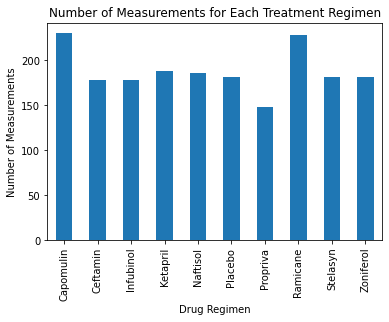

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bchrt_data = mouse_df_cln.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bchrt_plt_data = bchrt_data.plot.bar(rot='vertical',title='Number of Measurements for Each Treatment Regimen')
bchrt_plt_data.set_xlabel('Drug Regimen')
bchrt_plt_data.set_ylabel('Number of Measurements')


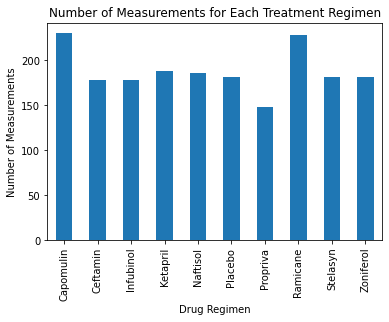

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bchrt_data = mouse_df_cln.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bchrt_plt_data = bchrt_data.plot.bar(rot='vertical',title='Number of Measurements for Each Treatment Regimen')

plt.xdata = bchrt_plt_data.plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')
plt.title('Number of Measurements for Each Treatment Regimen')
plt.show()


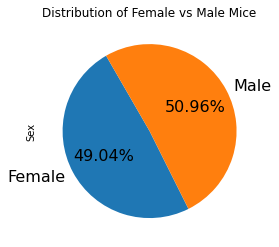

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
p_gndr = mouse_df_cln.groupby('Sex').count()['Mouse ID']
pie_plot = p_gndr.plot.pie(ylabel='Sex',title='Distribution of Female vs Male Mice',startangle = 120,autopct = '%1.2f%%',fontsize=16)


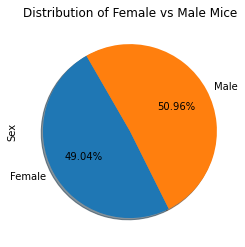

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
p_gndr = mouse_df_cln.groupby('Sex').count()['Mouse ID']
plt.pie(p_gndr, labels = p_gndr.index, autopct='%1.2f%%', shadow=True, startangle=120)
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxtp_df = pd.DataFrame(mouse_df_cln.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mrg_mouse_df_cln = pd.merge(mouse_df_cln, maxtp_df, on='Mouse ID')
mrg_mouse_df_cln.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_lst = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#Data frame for plot
drugs_df = mrg_mouse_df_cln[mrg_mouse_df_cln['Drug Regimen'].isin(drug_lst)]
#Last Value
lst_tumor_df = drugs_df.groupby(['Drug Regimen','Mouse ID']).agg(\
        # last value of the 'Tumor Volume (mm3)'
        lst_tumor_size=('Tumor Volume (mm3)',lambda x: x.iloc[-1])).round(3)

# View the groupby dataframe
lst_tumor_df

lst_tumor_size
Drug Regimen Mouse ID                
Capomulin    b128              38.983
             b742              38.940
             f966              30.486
             g288              37.074
             g316              40.159
...                               ...
Ramicane     s508              30.276
             u196              40.668
             w678              43.166
             y449              44.183
             z578              30.639

[100 rows x 1 columns]

In [17]:
# Reshape dataframe
lst_tumor_trans_df = lst_tumor_df.stack(level=0).unstack(level=0)
# View to confirm transpose
lst_tumor_trans_df.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,lst_tumor_size,NaN,NaN,67.973,NaN
a251,lst_tumor_size,NaN,NaN,65.526,NaN
a275,lst_tumor_size,NaN,62.999,NaN,NaN
a411,lst_tumor_size,NaN,NaN,NaN,38.408
a444,lst_tumor_size,NaN,NaN,NaN,43.048


In [18]:
# Create empty list to fill with tumor vol data (for plotting)
boxplot_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
counter = 0
for drug in drug_lst:
    quartiles = lst_tumor_trans_df[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    # Check for first pass in loop, prints a blank ine for seperation
    if counter == 0:
        print()
    print(f'{drug} IQR data is:')
    print(f'Lower quartile of {drug} is: {lowerq}')
    print(f'Upper quartile of {drug} is: {upperq}')
    print(f'Interquartile range of {drug} is: {iqr}')
    print(f'Median of {drug} is: {quartiles[0.5]}')
    print(f'Values below {lower_bound} for {drug} could be outliers.')
    print(f'Values above {upper_bound} for {drug} could be outliers.')
    print()
    counter += 1

    # Determine outliers using upper and lower bounds


Capomulin IQR data is:
Lower quartile of Capomulin is: 32.38
Upper quartile of Capomulin is: 40.16
Interquartile range of Capomulin is: 7.78
Median of Capomulin is: 38.12
Values below 20.71 for Capomulin could be outliers.
Values above 51.83 for Capomulin could be outliers.

Ramicane IQR data is:
Lower quartile of Ramicane is: 31.56
Upper quartile of Ramicane is: 40.66
Interquartile range of Ramicane is: 9.1
Median of Ramicane is: 36.56
Values below 17.91 for Ramicane could be outliers.
Values above 54.31 for Ramicane could be outliers.

Infubinol IQR data is:
Lower quartile of Infubinol is: 54.05
Upper quartile of Infubinol is: 65.53
Interquartile range of Infubinol is: 11.48
Median of Infubinol is: 60.16
Values below 36.83 for Infubinol could be outliers.
Values above 82.75 for Infubinol could be outliers.

Ceftamin IQR data is:
Lower quartile of Ceftamin is: 48.72
Upper quartile of Ceftamin is: 64.3
Interquartile range of Ceftamin is: 15.58
Median of Ceftamin is: 59.85
Values below

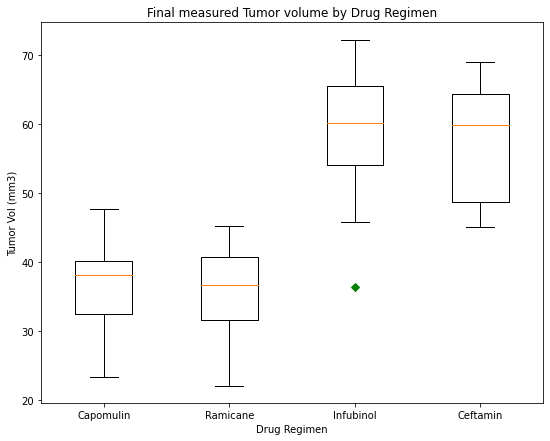

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Iterate through the list of the four drugs names using them to select the same column names
# and appending to the boxplot_list
for drug in drug_lst:
    boxplot_list.append(list(lst_tumor_trans_df[drug].dropna()))
 
# Plot the list of lists using a boxplot utilizing the same y-axis for all plots
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(boxplot_list,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_lst)

plt.show()

## Line and Scatter Plots

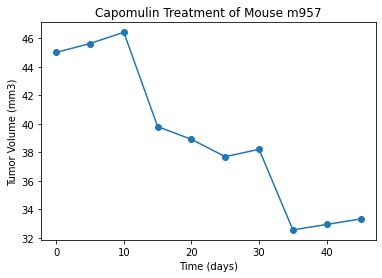

In [20]:
# Identify data points of a mouse treated with Capomulin
cap_mouse = mouse_df_cln.loc[mouse_df_cln['Mouse ID'] == 'm957']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(cap_mouse['Timepoint'],cap_mouse['Tumor Volume (mm3)'], marker = 'o')

# Add labels and title to plot
plt.title('Capomulin Treatment of Mouse m957')
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')


# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.8419.


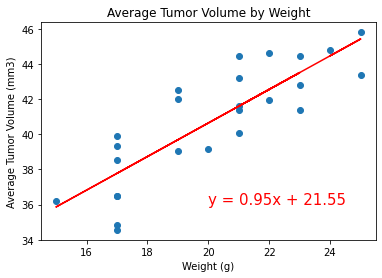

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap_df = mouse_df_cln.loc[mouse_df_cln['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(cap_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(cap_df, avg_vol_df, on='Mouse ID')
f_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
f_avg_vol_df
x = f_avg_vol_df['Weight (g)']
y = f_avg_vol_df['avg_tumor_vol']

correlation = st.pearsonr(x,y)
print(f'''The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],4)}.''')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
reg_vals = x * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,reg_vals,'r-')

# Annotate linear regression
plt.annotate(line_eq,(20,36),fontsize=15,color= 'red')

# Add labels and title to plot
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()